# NetworkX - Dynamics

_The contents of this notebook have been derived from "A First Course in Network Science" by Filippo Menczer. [You can see their official Github repository here.](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/tree/master)_

This tutorial will show you how to use the included Simulation class to simulate node dynamics by specifying a graph, the initial state of the nodes, and node state transitions.


In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# The following commands are used to reload our imports when we change them
# This is useful when we are developing our code and we want to test it
%load_ext autoreload
%autoreload 2

from simulation import (
    initial_state,
    initial_state_targeted,
    state_transition,
    Simulation,
)

---


## The SIR model

This is one of the fundamental models of spreading dynamics on networks. We will implement this spreading model using our simulation framework.


### The Graph


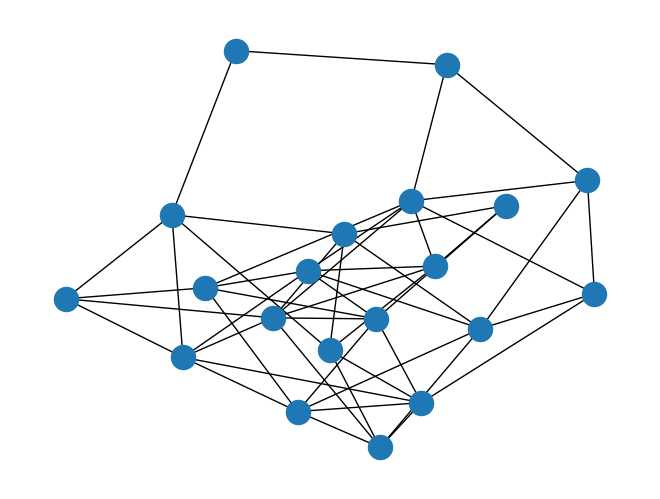

In [2]:
# Random graph with n nodes and m edges
G = nx.gnm_random_graph(n=20, m=50)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()
plt.close()

### Initial state

We will initially assign every node to the 'S' state and then randomly choose one node to infect by setting it to the 'I' state. You should experiment with different choices of the "patient zero" node to infect and see how it affects the spreading dynamics, _e.g._ by selecting a high- or low-degree node.

We will develop the function `initial_state()` inside the [simulation](simulation.py) script. This practice is useful to keep the code organized and modular.

See if the function works:


In [3]:
initial_state(G)

{0: 'S',
 1: 'I',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'S',
 9: 'S',
 10: 'S',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'S',
 15: 'S',
 16: 'S',
 17: 'S',
 18: 'S',
 19: 'S'}

### State transition


The SIR model involves two parameters, $\beta$ is the probability to transition from S to I given an infected neighbor, and $\gamma$, the probability of transitioning from I to S.

In pseudocode, the algorithm looks like this:

- For each node in the graph
  - If node has state I
    - The node transitions to state S with probability $\gamma$
  - Else node has state S
    - For each neighbor of the node
      - If neighbor has state I
        - The node transitions to state I with probability $\beta$

The logic gets a little deep with the indentations, but the code looks very much like this pseudocode.

Again, we develop this function `state_transition()` inside the [simulation](simulation.py) script.

Let's test this out before moving forward:


In [4]:
test_state = initial_state(G)
state_transition(G, test_state)

{2: 'I', 3: 'I'}

It's possible, depending on your parameter values, that the first transition results in no state changes. This is okay, even expected. It might take a few tries before any states are updated and a nonempty dict is produced. It's also okay to skip this, as we're just checking our code accuracy, but it is easier to debug here than in the simulation proper.


### Simulation

Now let's create the simulation and visualize the initial state:


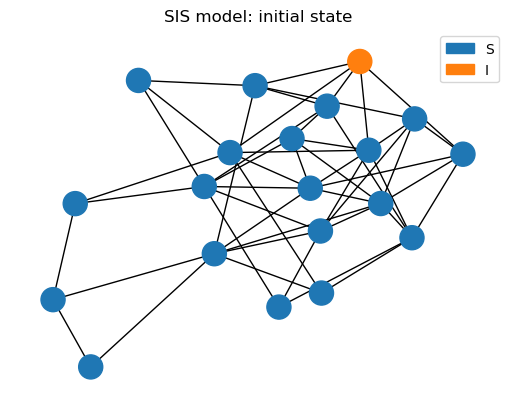

In [ ]:
# Random graph with n nodes and m edges
G = nx.gnm_random_graph(n=20, m=50)

sim = Simulation(G, initial_state, state_transition, name="SIR model")

sim.draw()
plt.show()
plt.close()

### Run the simulation

Let's run this simulation several steps and see where we end up:


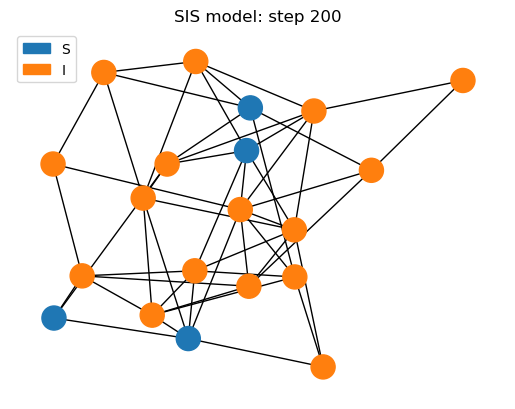

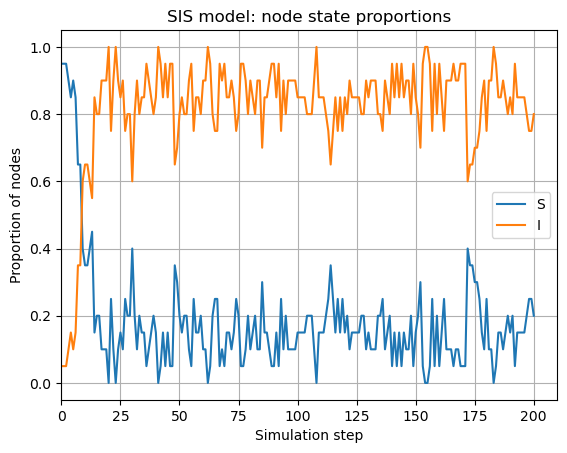

In [ ]:
# Random graph with n nodes and m edges
G = nx.gnm_random_graph(n=20, m=50)

# Reinitialize the simulation
sim = Simulation(G, initial_state, state_transition, name="SIR model")

# Run the simulation
sim.run(200)

# Draw the graph
sim.draw()
plt.show()
plt.close()

# Draw the evolution of the number of infected nodes
sim.plot()
plt.grid()
plt.show()
plt.close()

### Dependence on SIR Parameters


What happens when we reduce the chance of recovery $\gamma$?


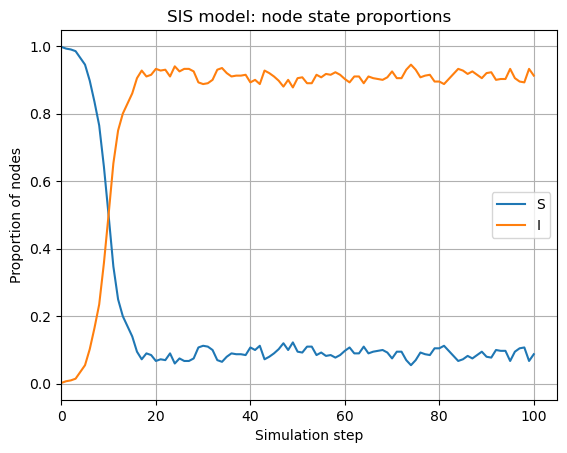

In [ ]:
# Random graph with n nodes and m edges
G = nx.gnm_random_graph(n=400, m=1000)

# Reinitialize the simulation
sim = Simulation(
    G, initial_state, state_transition, gamma=0.05, beta=0.2, name="SIR model"
)

# Run the simulation
sim.run(100)

# Draw the evolution of the number of infected nodes
sim.plot()
plt.grid()
plt.show()
plt.close()

What if we increase the recovery rate $\gamma$?


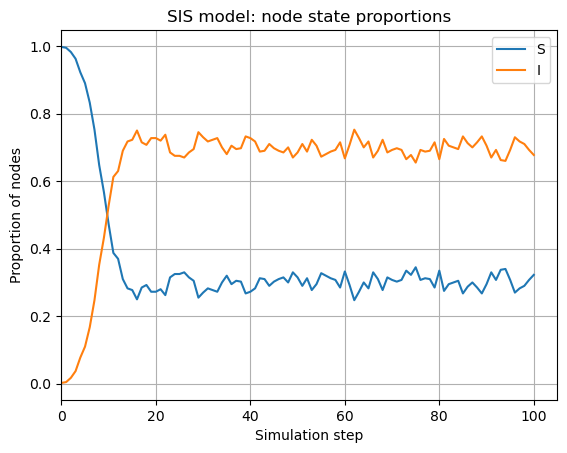

In [ ]:
# Random graph with n nodes and m edges
G = nx.gnm_random_graph(n=400, m=1000)

# Reinitialize the simulation
sim = Simulation(
    G, initial_state, state_transition, gamma=0.2, beta=0.2, name="SIR model"
)

# Run the simulation
sim.run(100)

# Draw the evolution of the number of infected nodes
sim.plot()
plt.grid()
plt.show()
plt.close()

### Dependence on Network Structure


#### Small World Networks


Choosing the patient zero at random:


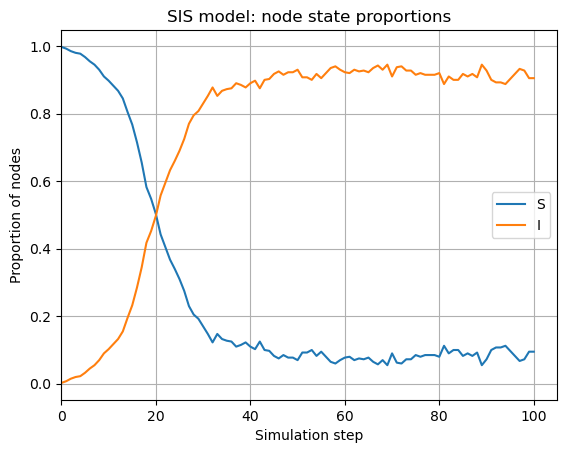

In [ ]:
# Watts-Strogatz graph with n nodes, each connected to its k nearest neighbors
G = nx.watts_strogatz_graph(n=400, k=4, p=0.1)

# Reinitialize the simulation
sim = Simulation(
    G, initial_state, state_transition, gamma=0.05, beta=0.2, name="SIR model"
)

# Run the simulation
sim.run(100)

# Draw the evolution of the number of infected nodes
sim.plot()
plt.grid()
plt.show()
plt.close()

Choosing as patient zero the node with the highest degree:


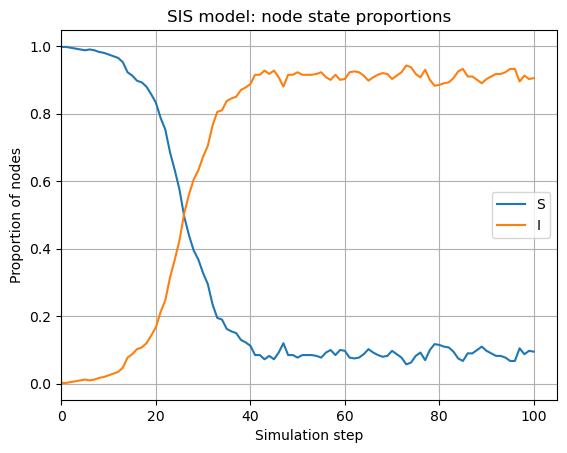

In [ ]:
# Watts-Strogatz graph with n nodes, each connected to its k nearest neighbors
G = nx.watts_strogatz_graph(n=400, k=4, p=0.1)

# Reinitialize the simulation
sim = Simulation(
    G, initial_state_targeted, state_transition, gamma=0.05, beta=0.2, name="SIR model"
)

# Run the simulation
sim.run(100)

# Draw the evolution of the number of infected nodes
sim.plot()
plt.grid()
plt.show()
plt.close()

Choosing as patient zero the node with the lowest degree:


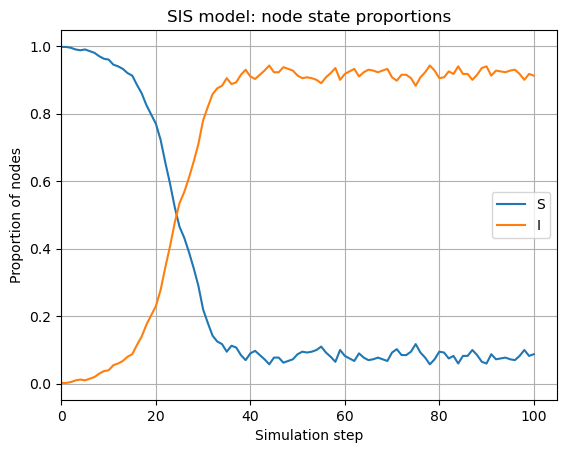

In [ ]:
# Watts-Strogatz graph with n nodes, each connected to its k nearest neighbors
G = nx.watts_strogatz_graph(n=400, k=4, p=0.1)


def initial_state_min(G: nx.Graph) -> dict:
    return initial_state_targeted(G, target="min")


# Reinitialize the simulation
sim = Simulation(
    G, initial_state_min, state_transition, gamma=0.05, beta=0.2, name="SIR model"
)

# Run the simulation
sim.run(100)

# Draw the evolution of the number of infected nodes
sim.plot()
plt.grid()
plt.show()
plt.close()

#### Free Scale Networks


Free scale network, choosing the patient zero at random:


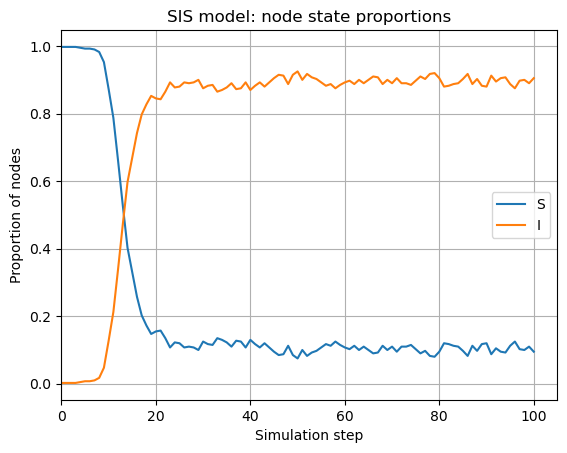

In [ ]:
# Barabasi-Albert graph with n nodes and m edges to attach from a new node to existing nodes
G = nx.barabasi_albert_graph(n=400, m=2)

# Reinitialize the simulation
sim = Simulation(
    G, initial_state, state_transition, gamma=0.05, beta=0.2, name="SIR model"
)

# Run the simulation
sim.run(100)

# Draw the evolution of the number of infected nodes
sim.plot()
plt.grid()
plt.show()
plt.close()

Free scale network, choosing as patient zero the node with the highest degree:


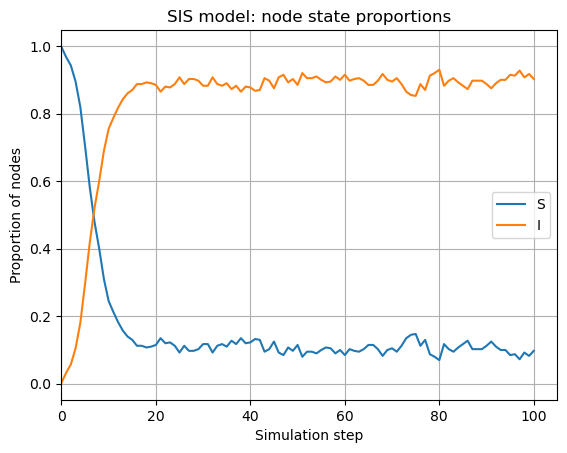

In [ ]:
# Barabasi-Albert graph with n nodes and m edges to attach from a new node to existing nodes
G = nx.barabasi_albert_graph(n=400, m=2)

# Reinitialize the simulation
sim = Simulation(
    G, initial_state_targeted, state_transition, gamma=0.05, beta=0.2, name="SIR model"
)

# Run the simulation
sim.run(100)

# Draw the evolution of the number of infected nodes
sim.plot()
plt.grid()
plt.show()
plt.close()

Free scale network, choosing as patient zero the node with the lowest degree:


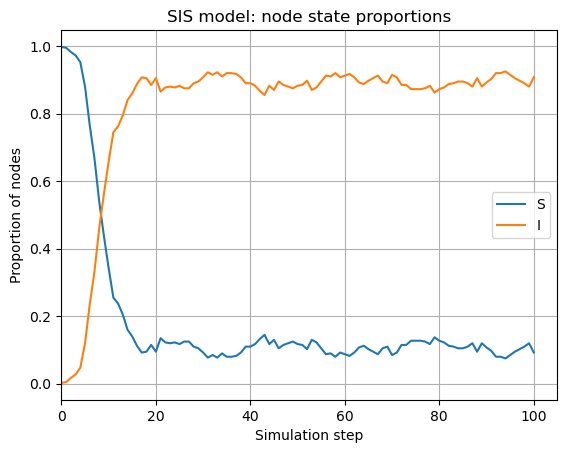

In [ ]:
# Barabasi-Albert graph with n nodes and m edges to attach from a new node to existing nodes
G = nx.barabasi_albert_graph(n=400, m=2)

# Reinitialize the simulation
sim = Simulation(
    G, initial_state_min, state_transition, gamma=0.05, beta=0.2, name="SIR model"
)

# Run the simulation
sim.run(100)

# Draw the evolution of the number of infected nodes
sim.plot()
plt.grid()
plt.show()
plt.close()

#### Enron email network


In the Enron email network, choosing a random node as patient zero:


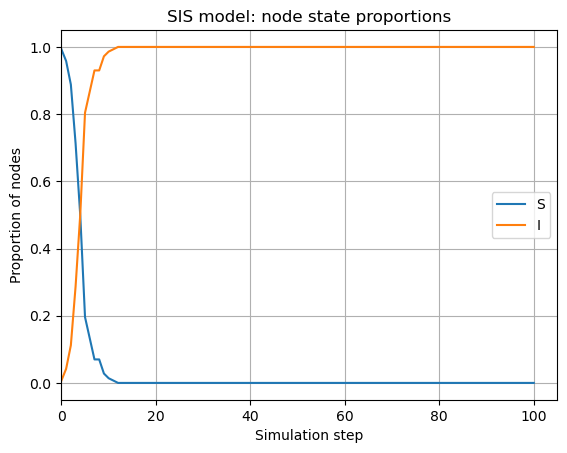

In [ ]:
# Load the graph
G = nx.read_edgelist("../../data/ia-enron-only/ia-enron-only.edges", nodetype=int)

# Reinitialize the simulation
sim = Simulation(
    G, initial_state, state_transition, gamma=0.0, beta=0.2, name="SIR model"
)

# Run the simulation
sim.run(100)

# Draw the evolution of the number of infected nodes
sim.plot()
plt.grid()
plt.show()
plt.close()

What if we explicitly infect the highest-degree node?


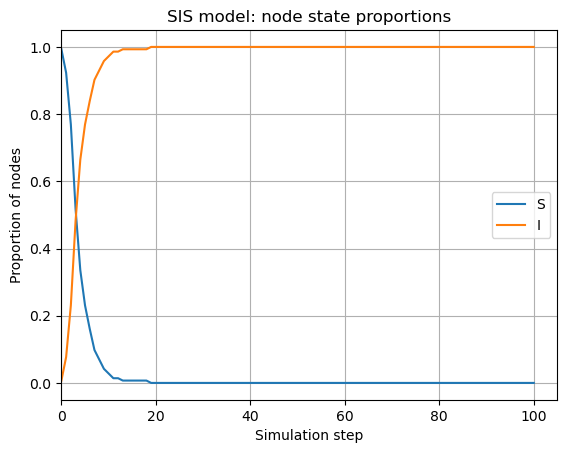

In [ ]:
# Load the graph
G = nx.read_edgelist("../../data/ia-enron-only/ia-enron-only.edges", nodetype=int)

# Reinitialize the simulation
sim = Simulation(
    G, initial_state_targeted, state_transition, gamma=0.0, beta=0.2, name="SIR model"
)

# Run the simulation
sim.run(100)

# Draw the evolution of the number of infected nodes
sim.plot()
plt.grid()
plt.show()
plt.close()

And if we infect the lowest-degree node?


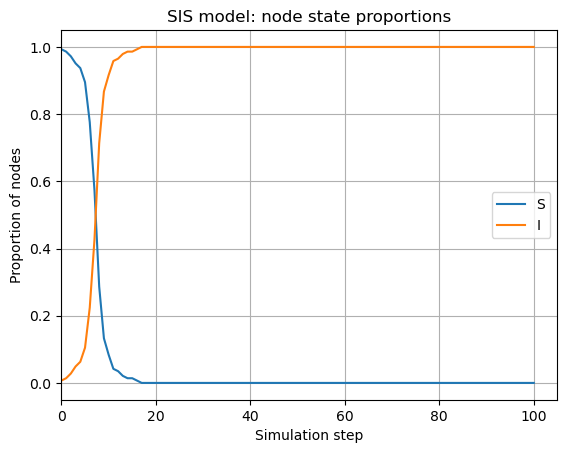

In [ ]:
# Load the graph
G = nx.read_edgelist("../../data/ia-enron-only/ia-enron-only.edges", nodetype=int)


def initial_state_min(G: nx.Graph) -> dict:
    return initial_state_targeted(G, target="min")


# Reinitialize the simulation
sim = Simulation(
    G, initial_state_min, state_transition, gamma=0.0, beta=0.2, name="SIR model"
)

# Run the simulation
sim.run(100)

# Draw the evolution of the number of infected nodes
sim.plot()
plt.grid()
plt.show()
plt.close()

---
